In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 로이터 기사 데이터 셋 로딩

from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words= 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(8982,)

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[0]

3

In [10]:
# 데이터 준비
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# 데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [12]:
# label 데이터의 엔코딩
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, sequence in enumerate(labels):
        results[i, sequence] = 1
    return results

# 데이터의 변환
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
# One-hot엔코딩 데이터를 Categorical 데이터로 변환
# 실제로 둘중에 하나로만 바꾸는 작업을하고 일반적으로 categorical로만 바꿔서 사용하기도함
from keras.utils.np.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# 신경망을 구성하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # layer는 64개 Dense이므로 얽혀있음 인풋 만개
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
# 모델 Layer 체크
model.summary()
# params(파라미터)의 갯수와 계산소요 시간이 비례
# 중간층의 크기가 충분히 크지 않다면 중간에 소실값이 너무 많음
# 학습시킬때는 문제가 없지만 케라스 파일로 저장해서 실무 운영할때 문제가 커질수있음

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', #셋 이상 분류이므로 categorical_crossentropy사용
              metrics=['accuracy'])

In [20]:
# 훈련데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 2.6521 - accuracy: 0.5319 - val_loss: 1.7771 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.4326 - accuracy: 0.7116 - val_loss: 1.3465 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.0729 - accuracy: 0.7676 - val_loss: 1.1758 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8505 - accuracy: 0.8150 - val_loss: 1.0629 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6830 - accuracy: 0.8559 - val_loss: 1.0001 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5454 - accuracy: 0.8893 - val_loss: 0.9491 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.4390 - accuracy: 0.9109 - val_loss: 0.9302 - val_accuracy: 0.8130
Epoch 8/20
16

결과 분석

10번째에서 가장 높은 학습 정확도와 검증 정확도를 확인할수있다


In [22]:
# 학습결과 저장

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

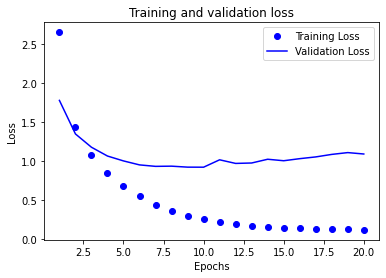

In [26]:
# 결과 시각화
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

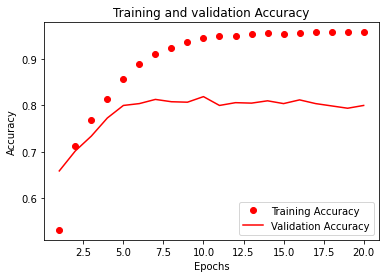

In [27]:
plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [28]:
# 신경망 테스트1 : 중간 히든레이어 4로
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # layer는 64개 Dense이므로 얽혀있음 인풋 만개
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', #셋 이상 분류이므로 categorical_crossentropy사용
              metrics=['accuracy'])

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val)
                    )

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

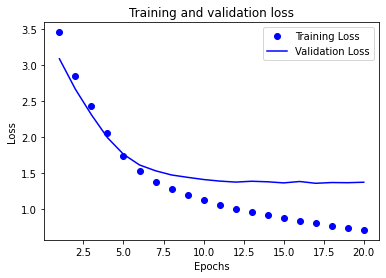

In [35]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

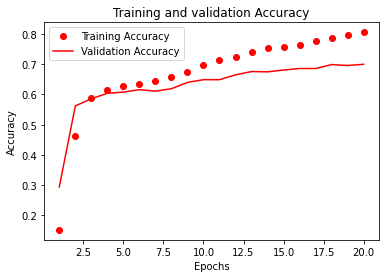

In [36]:
plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

중간 Layer가 너무 작기때문에 과도한 손실이 발생하여 

정확도가 떨어지고 반복에 의한 정확도가 오르는현상이 발생한다

In [38]:
# 신경망 테스트2 : 중간 히든레이어 1000로
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # layer는 64개 Dense이므로 얽혀있음 인풋 만개
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', #셋 이상 분류이므로 categorical_crossentropy사용
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.1813 - accuracy: 0.5034 - val_loss: 1.4579 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 1.2401 - accuracy: 0.7157 - val_loss: 1.1878 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 63ms/step - loss: 0.9373 - accuracy: 0.7810 - val_loss: 1.0834 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.7107 - accuracy: 0.8315 - val_loss: 1.0029 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 0.5426 - accuracy: 0.8705 - val_loss: 1.0431 - val_accuracy: 0.7680
Epoch 6/20
16/16 [==============================] - 1s 63ms/step - loss: 0.4032 - accuracy: 0.9053 - val_loss: 0.9526 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 63ms/step - loss: 0.3172 - accuracy: 0.9237 - val_loss: 0.9466 - val_accuracy: 0.8150
Epoch 8/20
16

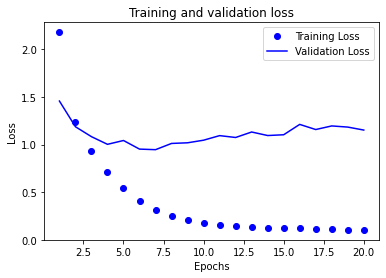

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

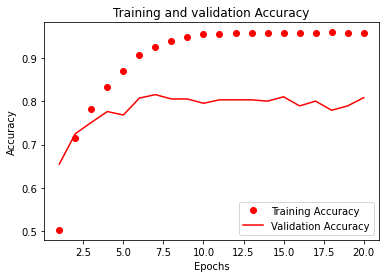

In [40]:
plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

최적화가 가능한 정도를 찾아야함

이걸 빠르고 정확하게 찾을수록 실력